<a href="https://colab.research.google.com/github/bharathssa/Machine-Learning/blob/main/Machine-Learning/Kaggle%20Competition/cardekho_selling_price_predict_kaggle_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [4]:
### There is no null value
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [5]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [6]:
df.head(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner


In [7]:
from datetime import date
today = date.today()
current_year = today.year
print(current_year)

2022


In [8]:
df['current_year'] = current_year
df.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,current_year
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,2022
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,2022
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,2022
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,2022
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,2022


In [9]:
df['No. of Years'] = df['current_year'] - df['year']
df.head(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,current_year,No. of Years
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,2022,15
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,2022,15
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,2022,10


In [10]:
# Year and Current year is not required at this stage since we have calculate the no.of year of the car

df.drop(columns = ['year','current_year'], inplace= True, axis =1 )

df.head(3)

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,No. of Years
0,Maruti 800 AC,60000,70000,Petrol,Individual,Manual,First Owner,15
1,Maruti Wagon R LXI Minor,135000,50000,Petrol,Individual,Manual,First Owner,15
2,Hyundai Verna 1.6 SX,600000,100000,Diesel,Individual,Manual,First Owner,10


Let's Do some EDA

In [11]:
numerical_features = [i for i in df.columns if df.dtypes[i]!='O']
print(numerical_features)

['selling_price', 'km_driven', 'No. of Years']


In [12]:
categorical_features = [i for i in df.columns if df.dtypes[i]=='O']
print (categorical_features)

['name', 'fuel', 'seller_type', 'transmission', 'owner']


In [13]:
### Extracting Unique features from categorical_features
for i in categorical_features:
  print ('{}:'.format(i) , df[i].unique())


name: ['Maruti 800 AC' 'Maruti Wagon R LXI Minor' 'Hyundai Verna 1.6 SX' ...
 'Mahindra Verito 1.5 D6 BSIII'
 'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV'
 'Hyundai i20 Magna 1.4 CRDi']
fuel: ['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
seller_type: ['Individual' 'Dealer' 'Trustmark Dealer']
transmission: ['Manual' 'Automatic']
owner: ['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']


In [14]:
### Let's see count of Fuel_varient used accross various car model
df['name'].groupby(df['fuel']).count().sort_values(ascending=False)

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: name, dtype: int64

In [15]:
### Let's see count of Transmission used accross various car model

df['name'].groupby(df['transmission']).count().sort_values(ascending=False)

transmission
Manual       3892
Automatic     448
Name: name, dtype: int64

In [16]:
### Let's see count of Seller_type used accross various car model

df['name'].groupby(df['seller_type']).count().sort_values(ascending=False)

seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: name, dtype: int64

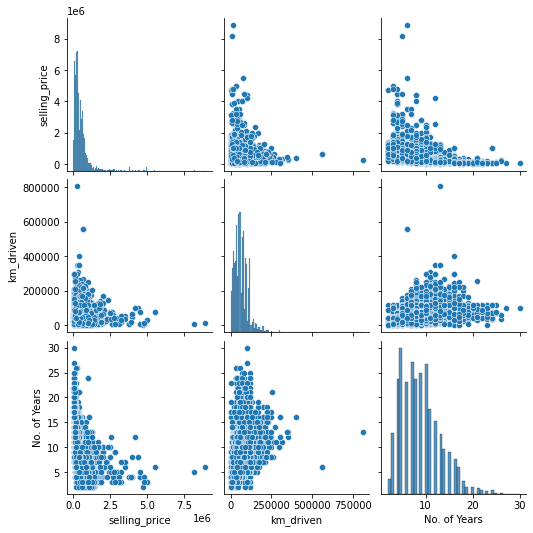

In [17]:
sns.pairplot(df)

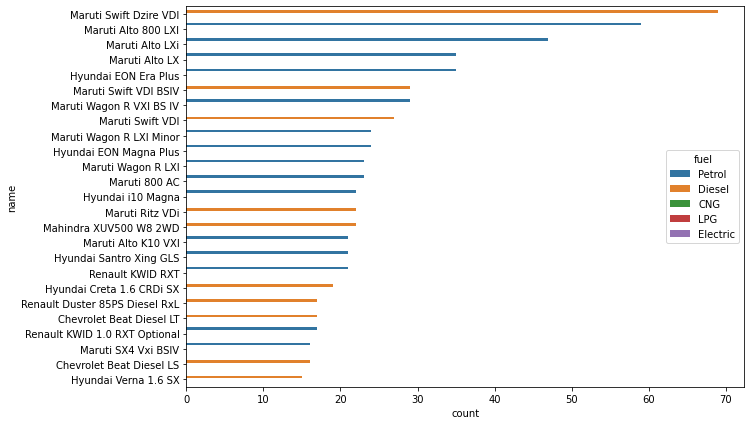

In [18]:
### Top 5 Model using Fuel_Type

plt.figure (figsize=(10,7)) 
sns.countplot(y='name', hue='fuel', data=df, order=df['name'].value_counts().iloc[:25].index)

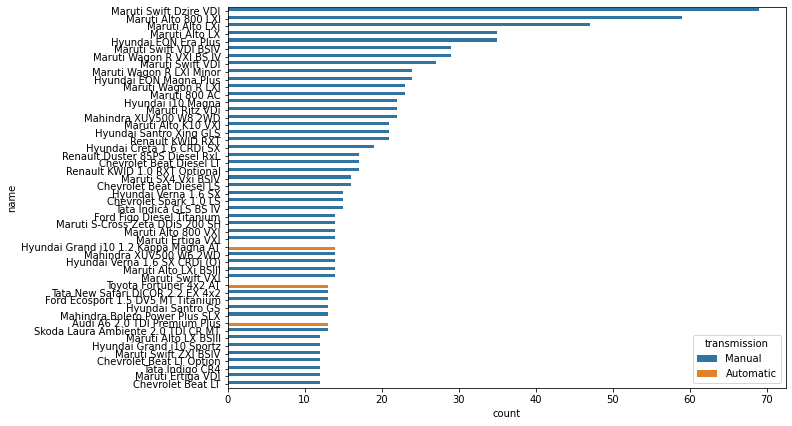

In [19]:
### Top 5 Model using Transmission

plt.figure (figsize=(10,7))
sns.countplot(y='name', hue='transmission', data=df, order=df['name'].value_counts().iloc[:50].index)

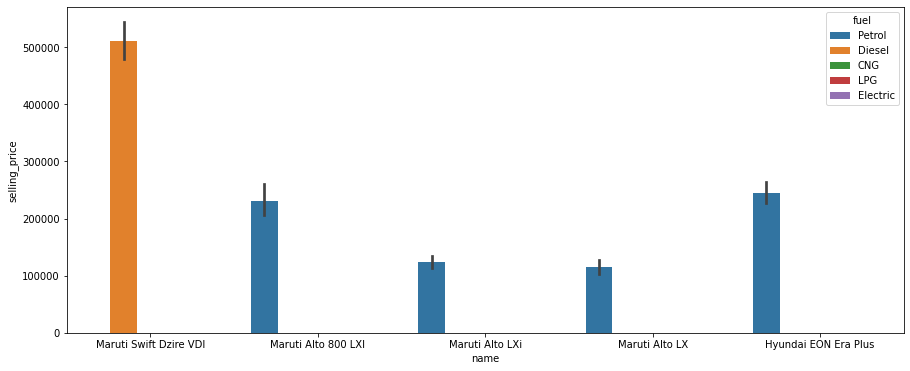

In [20]:
###LEt's see Top 10 car model's selling price using Fuel_type
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.barplot(y='selling_price', x='name', data=df, hue='fuel', order=df['name'].value_counts().iloc[:5].index)

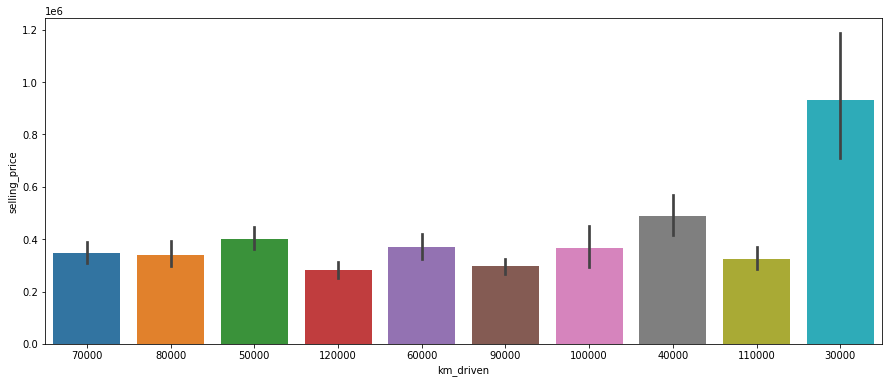

In [21]:
### Let's see whether Kms_Driven affects selling Price
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.barplot(y='selling_price', x='km_driven', data=df, order=df['km_driven'].sort_values(ascending=True).value_counts().iloc[:10].index )

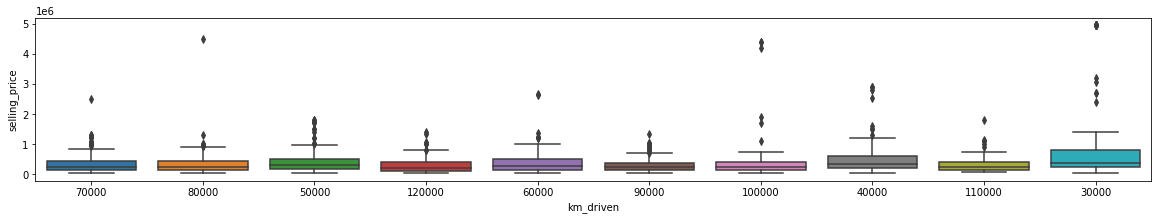

In [22]:
###Box plot to find outliers

fig, ax = plt.subplots(figsize=(20,3))
ax = sns.boxplot(x="km_driven", y="selling_price", data=df, order=df['km_driven'].sort_values(ascending=True).value_counts().iloc[:10].index)

In [23]:
print(df.corr())

               selling_price  km_driven  No. of Years
selling_price       1.000000  -0.192289     -0.413922
km_driven          -0.192289   1.000000      0.419688
No. of Years       -0.413922   0.419688      1.000000


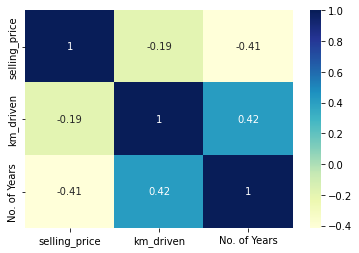

In [24]:
dataplot = sns.heatmap( df.corr(), cmap="YlGnBu", annot= True )
plt.show()

### Feature Engineering Part

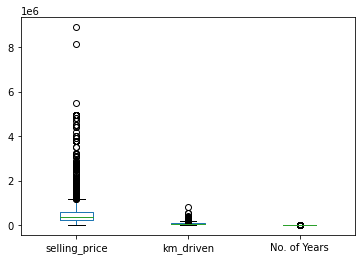

In [25]:
df.plot(kind='box')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


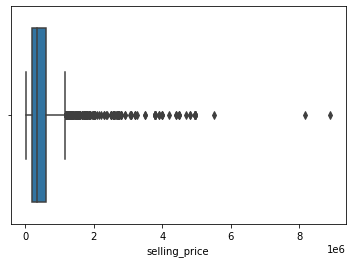

In [26]:
sns.boxplot(df['selling_price'])

In [27]:
from scipy import stats
z = np.abs(stats.zscore(df['selling_price']))
print(z)

[0.76774602 0.63809636 0.16573147 ... 0.68131292 0.62382691 0.48251678]


In [28]:
Threshold = 3
z1=np.where(z>3)
z2=np.array(z1)
print(z2)
z3 = z2.flatten()
print(z3)

[[  89   96  101  102  105  163  204  527  539  553  555  563  572  574
   582  591  593  601  610  612  620  731  770  836  898  900  908  917
   919  927  959  963  968  988 1021 1023 1026 1031 1065 1088 1107 1156
  1288 1290 1303 1410 1441 1479 1623 1646 1705 1834 1836 1844 1915 1977
  2178 2237 2239 2247 2256 2258 2266 2295 2323 2503 2574 2580 2582 2616
  2737 2739 2747 3064 3065 3066 3261 3453 3596 3721 3851 3863 3872 3873
  3875 3883 3969 4047 4186 4224 4304 4313]]
[  89   96  101  102  105  163  204  527  539  553  555  563  572  574
  582  591  593  601  610  612  620  731  770  836  898  900  908  917
  919  927  959  963  968  988 1021 1023 1026 1031 1065 1088 1107 1156
 1288 1290 1303 1410 1441 1479 1623 1646 1705 1834 1836 1844 1915 1977
 2178 2237 2239 2247 2256 2258 2266 2295 2323 2503 2574 2580 2582 2616
 2737 2739 2747 3064 3065 3066 3261 3453 3596 3721 3851 3863 3872 3873
 3875 3883 3969 4047 4186 4224 4304 4313]


In [29]:
print('Old Shape:', df.shape)

Old Shape: (4340, 8)


In [30]:
df.drop(z3, inplace=True, axis=0)
df

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,No. of Years
0,Maruti 800 AC,60000,70000,Petrol,Individual,Manual,First Owner,15
1,Maruti Wagon R LXI Minor,135000,50000,Petrol,Individual,Manual,First Owner,15
2,Hyundai Verna 1.6 SX,600000,100000,Diesel,Individual,Manual,First Owner,10
3,Datsun RediGO T Option,250000,46000,Petrol,Individual,Manual,First Owner,5
4,Honda Amaze VX i-DTEC,450000,141000,Diesel,Individual,Manual,Second Owner,8
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),409999,80000,Diesel,Individual,Manual,Second Owner,8
4336,Hyundai i20 Magna 1.4 CRDi,409999,80000,Diesel,Individual,Manual,Second Owner,8
4337,Maruti 800 AC BSIII,110000,83000,Petrol,Individual,Manual,Second Owner,13
4338,Hyundai Creta 1.6 CRDi SX Option,865000,90000,Diesel,Individual,Manual,First Owner,6


In [31]:
print('New Shape:',df.shape)

New Shape: (4248, 8)


### Feature Selection

In [32]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df['name'])
df['name'] = le.fit_transform(df['name'])
df.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,No. of Years
0,753,60000,70000,Petrol,Individual,Manual,First Owner,15
1,1019,135000,50000,Petrol,Individual,Manual,First Owner,15
2,490,600000,100000,Diesel,Individual,Manual,First Owner,10
3,105,250000,46000,Petrol,Individual,Manual,First Owner,5
4,264,450000,141000,Diesel,Individual,Manual,Second Owner,8


In [33]:
df = pd.get_dummies(df, drop_first=True)
df

,name,selling_price,km_driven,No. of Years,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,753,60000,70000,15,0,0,0,1,1,0,1,0,0,0,0
1,1019,135000,50000,15,0,0,0,1,1,0,1,0,0,0,0
2,490,600000,100000,10,1,0,0,0,1,0,1,0,0,0,0
3,105,250000,46000,5,0,0,0,1,1,0,1,0,0,0,0
4,264,450000,141000,8,1,0,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,587,409999,80000,8,1,0,0,0,1,0,1,0,1,0,0
4336,586,409999,80000,8,1,0,0,0,1,0,1,0,1,0,0
4337,755,110000,83000,13,0,0,0,1,1,0,1,0,1,0,0
4338,366,865000,90000,6,1,0,0,0,1,0,1,0,0,0,0


In [34]:
y = df.selling_price
X = df.drop(columns='selling_price', axis=1)
X.head(10)

,name,km_driven,No. of Years,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,753,70000,15,0,0,0,1,1,0,1,0,0,0,0
1,1019,50000,15,0,0,0,1,1,0,1,0,0,0,0
2,490,100000,10,1,0,0,0,1,0,1,0,0,0,0
3,105,46000,5,0,0,0,1,1,0,1,0,0,0,0
4,264,141000,8,1,0,0,0,1,0,1,0,1,0,0
5,790,125000,15,0,0,0,1,1,0,1,0,0,0,0
6,530,25000,6,0,0,0,1,1,0,1,0,0,0,0
7,1226,60000,8,0,0,0,1,1,0,1,0,1,0,0
8,375,25000,7,0,0,0,1,1,0,1,0,0,0,0
9,812,78000,5,0,0,0,0,1,0,1,0,0,0,0


In [35]:
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import xgboost as xgb

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [37]:
print(X_train.shape)
print(X_test.shape)

(3398, 14)
(850, 14)


In [38]:
def final_predictions(model, name):
    new_model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("============= %s and Shuffle Split =============" %name)
    print("Accuracy: %f" %(r2_score(y_test, y_pred)))
    print("MSE: %f" %(mean_squared_error(y_test, y_pred)))
    print("MAE: %f" %(mean_absolute_error(y_test, y_pred)))
    
    new_model = model.fit(X, y)
    cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
    cvs = cross_val_score(model, X, y, cv=cv)
    print('Shuffle and cross validate: %s \nAverage: %.2f' %(cvs, cvs.mean()))

In [39]:
### Linear Regression
lr_model = LinearRegression()
final_predictions(lr_model, 'Linear Regression')

============= Linear Regression and Shuffle Split =============
Accuracy: 0.487829
MSE: 56892156987.431847
MAE: 160943.316897
Shuffle and cross validate: [0.49453649 0.5005771  0.50602137 0.48992183 0.51420586] 
Average: 0.50


In [40]:
dt_model = DecisionTreeRegressor(random_state=0)
final_predictions(dt_model, 'Decision Tree Regressor')

============= Decision Tree Regressor and Shuffle Split =============
Accuracy: 0.595157
MSE: 44970045460.051369
MAE: 105729.099216
Shuffle and cross validate: [0.58035132 0.65573973 0.71593998 0.61989637 0.69677936] 
Average: 0.65


In [41]:
rf_model = RandomForestRegressor(random_state=0)
final_predictions(rf_model, 'Random Forest Regressor')

============= Random Forest Regressor and Shuffle Split =============
Accuracy: 0.753065
MSE: 27429590635.188671
MAE: 90003.960189
Shuffle and cross validate: [0.75934867 0.76176877 0.82603837 0.76651815 0.81976238] 
Average: 0.79


In [42]:
###Hyperparameter tuning (Random Search)

from itertools import product
import random

#params
booster = 'gbtree'
silent = 0

eta = [0.01,0.1,0.2,0.3]  #learning rate in gbm
min_child_weight = [1,2,0.5]  #minimum sum of weights of all observations required in a child
max_depth = [3,6,8]  #maximum depth of the tree
gamma = [0,1]  #a split will occur only when reduction in loss function > gamma 
subsample = [0.5,0.7,1] #fraction of rows to be sampled to make a decision tree
colsample_bytree = [0.5,0.7,1] #fraction of columns to be sampled to make a decision tree
# lambda_ = [0.4,0.8,1] #L2 regularization weights
alpha = [0,1]  #L1 reg weights



params =  [eta,min_child_weight,max_depth,gamma,subsample,colsample_bytree,alpha]
parameters = list(product(*params))
parameters = random.sample(parameters,100)
len(parameters)


min_rmse = float('inf')
best_params = parameters[0]
for p in parameters:
    eta = p[0]
    min_child_weight = p[1]
    max_depth = p[2]
    gamma = p[3]
    subsample = p[4]
    colsample_bytree = p[5]
    alpha = p[6]

    print('Random Search On Hyperparamters Xgboost')
    print(f"Fitting params -> eta: {eta}, min_child_weight: {min_child_weight} ,\
    max_depth:{max_depth}, gamma: {gamma}, subsample : {subsample},\
    col_sample_bytree: {colsample_bytree:},alpha: {alpha}")
    
    model = xgb.XGBRegressor(random_state=42,booster = 'gbtree',verbosity=0,eta=eta,
                             min_child_weight=min_child_weight,max_depth=max_depth,gamma=gamma,
                             subsample=subsample,colsample_bytree=colsample_bytree,alpha=alpha)
    
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    y_pred_rmse = mean_squared_error(y_test,y_pred,squared=False)
    
    
    print(f'Train rmse: {y_pred_rmse}')
    
    
    if y_pred_rmse < min_rmse:
        min_rmse = y_pred_rmse
        best_params = p
        
    print('--'*50)
    

    
print(f'Found following best parameters: eta: {best_params[0]},\
min_child_weight: {best_params[1]} , max_depth:{best_params[2]}, gamma: {best_params[3]}, subsample : {best_params[4]}, \
col_sample_bytree: {best_params[5]},alpha: {best_params[6]} with validation loss {min_rmse}')

Random Search On Hyperparamters Xgboost
Fitting params -> eta: 0.1, min_child_weight: 0.5 ,    max_depth:8, gamma: 0, subsample : 0.7,    col_sample_bytree: 0.5,alpha: 1
Train rmse: 135906.90893551923
----------------------------------------------------------------------------------------------------
Random Search On Hyperparamters Xgboost
Fitting params -> eta: 0.1, min_child_weight: 0.5 ,    max_depth:8, gamma: 0, subsample : 1,    col_sample_bytree: 1,alpha: 1
Train rmse: 155529.2829575528
----------------------------------------------------------------------------------------------------
Random Search On Hyperparamters Xgboost
Fitting params -> eta: 0.01, min_child_weight: 2 ,    max_depth:6, gamma: 1, subsample : 0.7,    col_sample_bytree: 0.5,alpha: 1
Train rmse: 145829.17882982845
----------------------------------------------------------------------------------------------------
Random Search On Hyperparamters Xgboost
Fitting params -> eta: 0.1, min_child_weight: 2 ,    max_dep

In [43]:
###Best Params taken from Hyperparameter Tuning.

eta = best_params[0] 
min_child_weight= best_params[1] 
max_depth=best_params[2]
gamma= best_params[3]
subsample = best_params[4]
colsample_bytree= best_params[5]
alpha= best_params[6] 

xgb_model = xgb.XGBRegressor(random_state=42,booster = 'gbtree',verbosity=0,eta=eta,min_child_weight=min_child_weight,
                         max_depth=max_depth,gamma=gamma,subsample=subsample,colsample_bytree=colsample_bytree,alpha=alpha)

final_predictions(xgb_model, 'XGB Regressor')


============= XGB Regressor and Shuffle Split =============
Accuracy: 0.839299
MSE: 17850728797.475262
MAE: 83492.634899
Shuffle and cross validate: [0.79474016 0.8074199  0.83458393 0.80723527 0.86384606] 
Average: 0.82
